page 19

## Introduction

In [21]:
from pylab import plt
plt.style.use('ggplot')
import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'

## Finance and Python Syntax

In [22]:
S0 = 100.
K = 105.
T = 1.0
r = 0.05
sigma = 0.2

In [23]:
from numpy import *

I = 100000

random.seed(1000)
z = random.standard_normal(I)
ST = S0 * exp(r * T + sigma * sqrt(T) * z)
hT = maximum(ST - K, 0)
C0 = exp(-r * T) * sum(hT) / I

In [24]:
print("Value of the European Call Option %5.3f" % C0)

Value of the European Call Option 9.149


## Time-to-Results

In [25]:
import numpy as np
import pandas as pd

In [26]:
# data from Thomson Reuters Eikon API
raw = pd.read_csv('c:\\Users\\Matthieu\\Documents\\tr_eikon_eod_data.csv',
                   index_col=0, parse_dates=True)
amzn = pd.DataFrame(raw['AMZN.O'])
amzn.columns = ['Close']
amzn.tail()

,Close
Date,
2017-10-25,972.91
2017-10-26,972.43
2017-10-27,1100.95
2017-10-30,1110.85
2017-10-31,1105.28


In [27]:
amzn['Log_Ret'] = np.log(amzn['Close'] / amzn['Close'].shift(1))
amzn['Volatility'] = amzn['Log_Ret'].rolling(window=252).std() * np.sqrt(252)

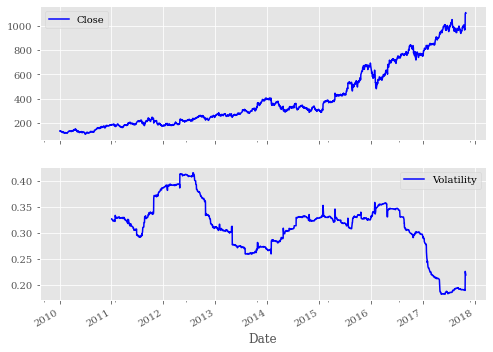

In [28]:
%matplotlib inline
amzn[['Close', 'Volatility']].plot(subplots=True, color='blue',
                                   figsize=(8, 6), grid=True);
# tag: amzn_vola
# title: Amazon closing prices and yearly volatility

## Paradigm

In [29]:
loops = 2500000
from math import *
a = range(1, loops)
def f(x):
    return 3 * log(x) + cos(x) ** 2
%timeit r = [f(x) for x in a]

917 ms ± 31.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [30]:
import numpy as np
a = np.arange(1, loops)
%timeit r = 3 * np.log(a) + np.cos(a) ** 2

48 ms ± 562 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [31]:
import numexpr as ne
ne.set_num_threads(1)
f = '3 * log(a) + cos(a) ** 2'
%timeit r = ne.evaluate(f)

32.4 ms ± 1.93 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [32]:
ne.set_num_threads(4)
%timeit r = ne.evaluate(f)

15.7 ms ± 2.11 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
